# Music Clustering Project

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the data
df = pd.read_csv("Data/ML_spotify_data.csv")
df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10000 non-null  object 
 1   artists       10000 non-null  object 
 2   popularity    10000 non-null  int64  
 3   danceability  10000 non-null  float64
 4   valence       10000 non-null  float64
 5   energy        10000 non-null  float64
 6   explicit      10000 non-null  int64  
 7   key           10000 non-null  int64  
 8   liveness      10000 non-null  float64
 9   loudness      10000 non-null  float64
 10  speechiness   10000 non-null  float64
 11  tempo         10000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB


In [5]:
# Check for missing values
df.isnull().sum()

name            0
artists         0
popularity      0
danceability    0
valence         0
energy          0
explicit        0
key             0
liveness        0
loudness        0
speechiness     0
tempo           0
dtype: int64

In [6]:
df.duplicated().any()

np.True_

In [7]:
dup_rows = df.duplicated(subset=['name', 'artists']).sum()
print(f"Duplicated rows are: {dup_rows}")
print(df[df.duplicated(subset=['name', 'artists'])].head(10))

Duplicated rows are: 36
                             name                 artists  ...  speechiness    tempo
187    Sister Morphine - 2009 Mix  ['The Rolling Stones']  ...       0.0341   90.443
255                    La Partida         ['Victor Jara']  ...       0.1760   86.552
264    I Got The Blues - 2009 Mix  ['The Rolling Stones']  ...       0.0317  119.947
658            Raped and Freezin'        ['Alice Cooper']  ...       0.0337  123.595
855                     Watch Out                ['ABBA']  ...       0.0633  130.553
863   Gonna Sing You My Love Song                ['ABBA']  ...       0.0255   79.728
1358                 Almost Human                ['KISS']  ...       0.0879  184.290
2162    Rejoice - Remastered 2008                  ['U2']  ...       0.0850  168.209
2372                 Bad Religion        ['Bad Religion']  ...       0.0904  120.462
2585                   Breathless          ['Quiet Riot']  ...       0.1370  146.695

[10 rows x 12 columns]


In [8]:
# Removing duplicates
cleaned_data = df.drop_duplicates(subset=['name', 'artists'])
cleaned_data.shape

cleaned_data = df.to_csv("Data/ML_spotify_data_cleaned.csv")

In [9]:
# Feature selection
# Selecting relevant features for clustering
df = pd.read_csv("Data/ML_spotify_data_cleaned.csv")
features = df[['danceability', 'valence', 'energy', 'explicit', 'key', 'liveness', 'loudness', 'speechiness', 'tempo']]

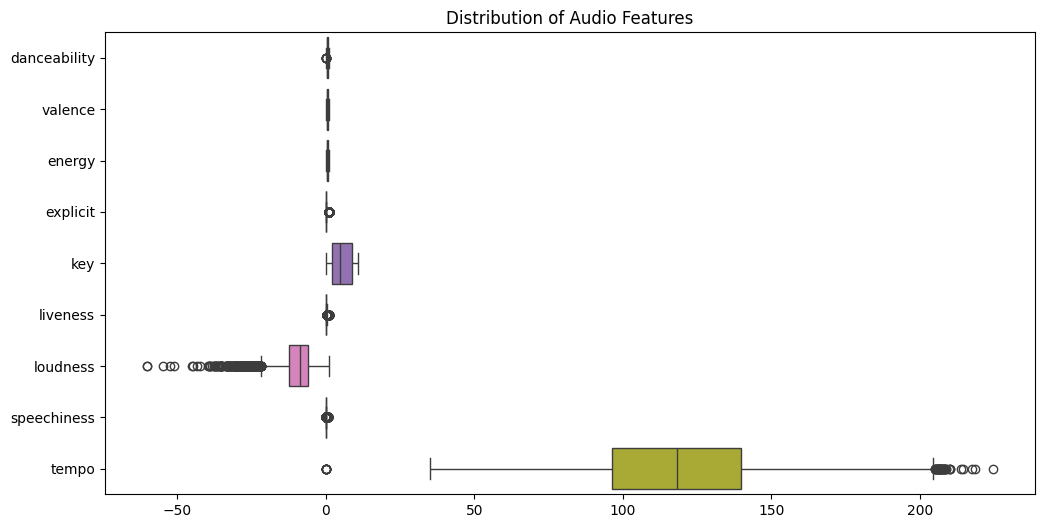

In [10]:
X = features
plt.figure(figsize=(12, 6))

# Melt the dataframe to plot all features at once
sns.boxplot(data=X, orient="h")
plt.title("Distribution of Audio Features")
plt.show()

In [14]:
# Scaling (Normalization)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())

   danceability   valence    energy  ...  loudness  speechiness     tempo
0      0.721511  0.137131 -0.637854  ... -0.540084    -0.478030 -0.082809
1     -0.525061 -1.010349 -0.892028  ... -0.163448    -0.531779  0.780035
2     -0.654211  1.185161  0.521816  ...  0.003632    -0.434235 -1.184390
3     -0.637365  1.326684  1.276395  ...  0.538890    -0.203313  1.778805
4      0.670974  0.156255 -0.717283  ... -0.615072    -0.134634 -1.370283

[5 rows x 9 columns]


## K-Means Clustering

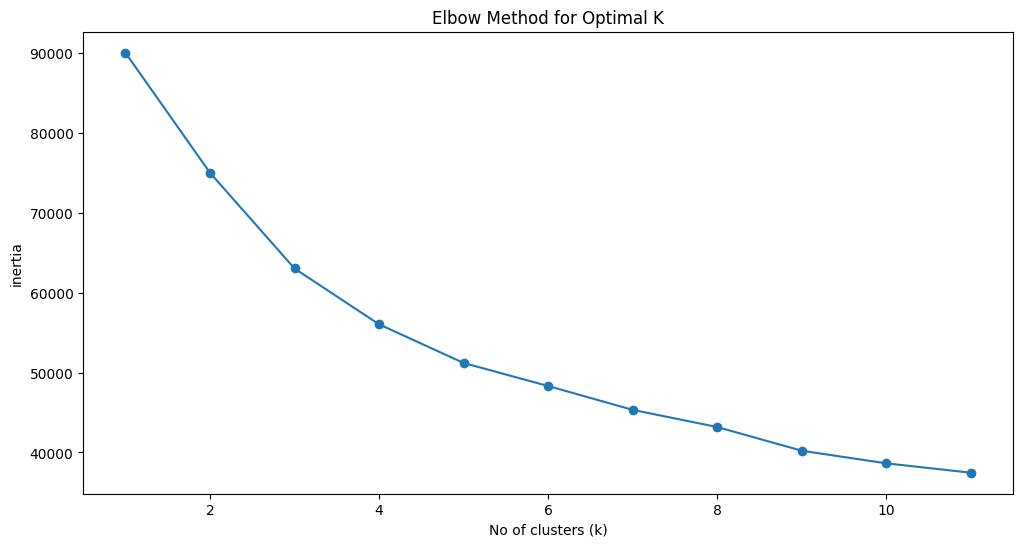

In [23]:
# Find K (optimsal number of clusters) using Elbow method
inertia = []
k_range = range(1,12)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow graph  
plt.figure(figsize= (12, 6))
plt.plot(k_range, inertia, marker = 'o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("No of clusters (k)")
plt.ylabel("inertia")
plt.show()



In [26]:
# Silhouette Score Method
kmeans_silhouette = []
silhouette_scores = []

for k in k_range[1:]:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_silhouette.append(kmeans)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

print("Silhouette Scores for different k values:")
for k, score in zip(k_range[1:12], silhouette_scores):
    print(f"k={k}: Silhouette Score={score:.4f}")

Silhouette Scores for different k values:
k=2: Silhouette Score=0.1688
k=3: Silhouette Score=0.2145
k=4: Silhouette Score=0.1811
k=5: Silhouette Score=0.1824
k=6: Silhouette Score=0.1612
k=7: Silhouette Score=0.1691
k=8: Silhouette Score=0.1544
k=9: Silhouette Score=0.1624
k=10: Silhouette Score=0.1608
k=11: Silhouette Score=0.1595


In [28]:
# K means with optimal clusters (k=5)

k =5
kmeans_final = KMeans(n_clusters=k, random_state=42)
df['X_scaled_df'] = kmeans_final.fit_predict(X_scaled)
